In [1]:
import pandas as pd

df = pd.read_csv('',sep=',')
df.head()

,Gene,BaseMean,Log2Fold,Pvalue
0,Pgl_GLEAN_10005356,257.588333,-0.076667,0.347962
1,Pgl_GLEAN_10038194,30.011667,-0.471667,0.449496
2,Pgl_GLEAN_10027414,84.375000,0.083333,0.685954
3,Pgl_GLEAN_10038163,29.290000,0.223333,0.675698
4,Pgl_GLEAN_10020883,3.830000,3.120000,0.048956


In [2]:
#=================== using top smallest log2fold change value to represent the total negative controls ========#

positive = df[(df.Log2Fold >= 2) & (df.Pvalue < 0.05)]
negative = df[(df.Log2Fold <= -2) & (df.Pvalue < 0.05)]
middle = df[(df.Log2Fold >= -0.2) & (df.Log2Fold <= 0.2)]

In [3]:
a = len(positive.BaseMean)
b = len(negative.BaseMean)
c = len(middle.BaseMean)

print a,b,c

7119 5816 27745


27861.06 18.71 2.08
9435.88 13.879999999999999 2.1


AttributeError: 'tuple' object has no attribute 'plot'

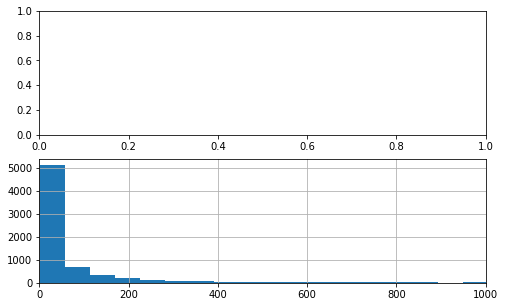

In [17]:
import numpy as np
import matplotlib.pyplot as plt

sm = middle[(middle.BaseMean >=1) & (middle.BaseMean <=200)]

print max(positive.BaseMean), np.median(positive.BaseMean), min(positive.BaseMean)
print max(negative.BaseMean), np.median(negative.BaseMean), min(negative.BaseMean)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))
positive[positive.BaseMean > 1].BaseMean.hist(bins=500).set_xlim(0,1000).plot(ax=axes[0,1])
sm.BaseMean.hist(bins=500).set_xlim(0,1000).plot(ax=axes[1,1])

In [29]:
sm = middle[(middle.BaseMean >=10) & (middle.BaseMean <=200)]
sm100 = middle[middle.BaseMean > 100].sample(frac=0.1)

#sm500 = middle[middle.BaseMean > 500].sample(frac=0.05)
middle = pd.concat([sm, sm100])
middle['AbsLog2Fold'] = abs(middle['Log2Fold'])
positive['AbsLog2Fold'] = abs(positive['Log2Fold'])
mymiddle = middle.sort_values(by=['AbsLog2Fold'])
mypositive = positive.sort_values(by=['AbsLog2Fold'])
fmiddle = mymiddle[:(a+b)]
fpositive = mypositive[:b]
pmiddle = mymiddle[:a]
nmiddle = mymiddle[:b]

/home/zliang/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [30]:
fpositive.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-positive-sameneg.csv')

In [73]:
import numpy as np

sm = middle[(middle.BaseMean >=1) & (middle.BaseMean <=50)]
sm100 = middle[middle.BaseMean > 50].sample(frac=0.1)
mymiddle = pd.concat([sm, sm100])

x = np.median(positive.BaseMean)
y = np.median(negative.BaseMean)
z = np.median(mymiddle.BaseMean)
print x,y,z,len(mymiddle.BaseMean)

18.515 14.24 17.130000000000006 15917


In [81]:
mymiddle['AbsLog2Fold'] = abs(mymiddle['Log2Fold'])
positive['AbsLog2Fold'] = abs(positive['Log2Fold'])

mymiddle = mymiddle.sort_values(by=['AbsLog2Fold'])
mypositive = positive.sort_values(by=['AbsLog2Fold'], ascending=False)
fmiddle = mymiddle[:(a+b)]
fpositive = mypositive[:b]
pmiddle = mymiddle[:a]
nmiddle = mymiddle[:b]
fmiddle.to_csv('6timepoints-FourSpecies-061819-I60-middle-samepos_neg.csv')
pmiddle.to_csv('6timepoints-FourSpecies-061819-I60-middle-samepos.csv')
nmiddle.to_csv('6timepoints-FourSpecies-061819-I60-middle-sameneg.csv')
fpositive.to_csv('6timepoints-FourSpecies-061819-I60-positive-sameneg.csv')
negative.to_csv('6timepoints-FourSpecies-061819-I60-negative.csv')

/home/zliang/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
negative['AbsLog2Fold'] = abs(negative['Log2Fold'])
mynegative = negative.sort_values(by=['AbsLog2Fold'], ascending=False)
pn = pd.concat([mypositive, mynegative])
pn.to_csv('6timepoints-FourSpecies-061819-I60-positive-plusneg.csv')

/home/zliang/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(0, 5000)

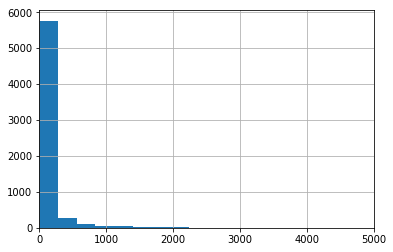

In [60]:
positive.BaseMean.hist(bins=100).set_xlim(0,5000)

(0, 5000)

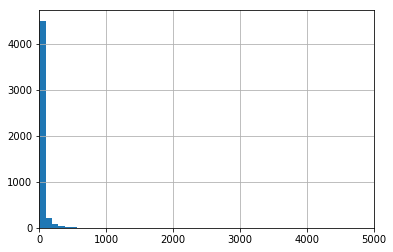

In [61]:
negative.BaseMean.hist(bins=100).set_xlim(0,5000)

(0, 5000)

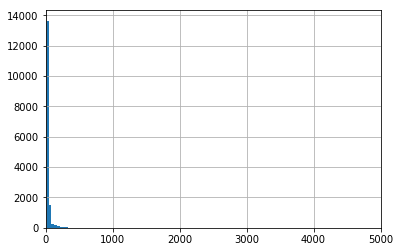

In [75]:
mymiddle.BaseMean.hist(bins=100).set_xlim(0,5000)

In [28]:
fmiddle.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-middle-samepos_neg.csv')
pmiddle.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-middle-samepos.csv')
nmiddle.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-middle-sameneg.csv')
positive.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-positive.csv')
negative.to_csv('6timepoints-FourSpecies-addbase-filter-addsignificant-negative.csv')